<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Background:

**Cardio Good Fitness is a retail store selling treadmill product(s). It provides a data set containing the following variables:**

Product - the model no. of the treadmill

Age - in no of years, of the customer

Gender - of the customer

Education - in no. of years, of the customer

Marital Status - of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

Income - of the customer

Miles- expected to run

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Goal:

**Help the company to identify the differences between its customers of treadmill product(s) and target new customers.** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 1. Import data set and explore the structure

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')  # import the data set from a csv file

In [3]:
df.head()  # check the first a few rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape # check the shape of the data

(180, 9)

In [5]:
df.dtypes # check the data type of each column

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Obeservation:** Product, gender and marital status are objects(strings). Others are integers.

In [6]:
df.isnull().sum() # check missing values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Obeservation:** no missing values in any column. 

In [7]:
df.describe().T  # summary

,count,mean,std,min,25%,50%,75%,max
Age,180.00,28.79,6.94,18.00,24.00,26.00,33.00,50.00
Education,180.00,15.57,1.62,12.00,14.00,16.00,16.00,21.00
Usage,180.00,3.46,1.08,2.00,3.00,3.00,4.00,7.00
Fitness,180.00,3.31,0.96,1.00,3.00,3.00,4.00,5.00
Income,180.00,"53,719.58","16,506.68","29,562.00","44,058.75","50,596.50","58,668.00","104,581.00"
Miles,180.00,103.19,51.86,21.00,66.00,94.00,114.75,360.00


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> 2. Univariate Analysis

### Product

In [8]:
sale_vol = pd.crosstab(index = df['Product'], columns = 'count')    # frequency table for product
sale_vol['percentage (%)'] = 100 * sale_vol['count'] / df['Product'].count()
sale_vol

col_0,count,percentage (%)
Product,,
TM195,80,44.44
TM498,60,33.33
TM798,40,22.22


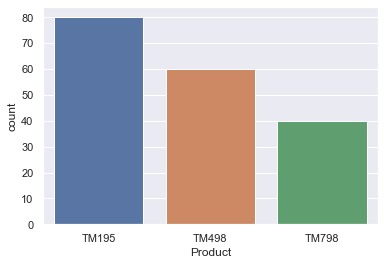

In [9]:
sns.countplot(data = df, x = 'Product');   # count plot

**Observation :** sales volume: TM195 > TM498 > TM798. 

### Age

In [10]:
df['Age'].describe().to_frame().T    # summary of age

,count,mean,std,min,25%,50%,75%,max
Age,180.00,28.79,6.94,18.00,24.00,26.00,33.00,50.00


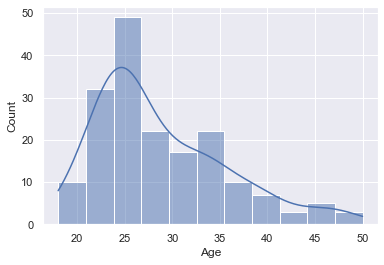

In [12]:
sns.histplot(data = df, x = 'Age', kde = True);  # histogram for age

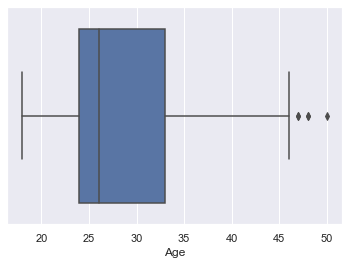

In [13]:
sns.boxplot(x = 'Age', data = df);  # box plot

**Observation :** age ranges from 18 to 50 years old. Most are under 33 years old. People at 25 contribute to the sales volume most significantly.

### Gender

In [14]:
gender = pd.crosstab(index = df['Gender'], columns = 'count')    # frequency table for gender
gender['percentage (%)'] = 100 * gender['count'] / df['Gender'].count()
gender

col_0,count,percentage (%)
Gender,,
Female,76,42.22
Male,104,57.78


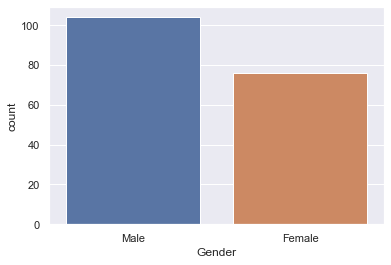

In [15]:
sns.countplot(data = df, x = 'Gender');  # count plot

**Observation :** about 60% of the customers are male.

### Education

In [16]:
df['Education'].describe().to_frame().T  # summary of education

,count,mean,std,min,25%,50%,75%,max
Education,180.00,15.57,1.62,12.00,14.00,16.00,16.00,21.00


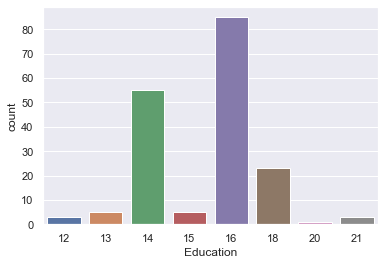

In [18]:
sns.countplot(data = df, x = 'Education');   # count plot

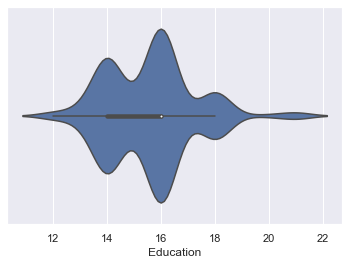

In [19]:
sns.violinplot(data =df, x = 'Education');  # violin plot

**Observation :** education years range from 12 to 21. Most are 16 or 14, corresponding to high education people.

### Marital status

In [20]:
marital = pd.crosstab(index = df['MaritalStatus'], columns = 'count')    # frequency table for marital status
marital['percentage (%)'] = 100 * marital['count'] / df['MaritalStatus'].count()
marital

col_0,count,percentage (%)
MaritalStatus,,
Partnered,107,59.44
Single,73,40.56


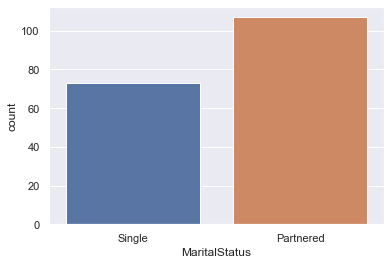

In [21]:
sns.countplot(data = df, x = 'MaritalStatus');  # count plot

**Observation :** about 60% of the customers are partnered.

### Usage

In [22]:
usage = pd.crosstab(index = df['Usage'], columns = 'count')     # frequency table for usage
usage['percentage (%)'] = 100 * usage / df['Usage'].count()
usage.T

Usage,2,3,4,5,6,7
col_0,,,,,,
count,33.00,69.00,52.00,17.00,7.00,2.00
percentage (%),18.33,38.33,28.89,9.44,3.89,1.11


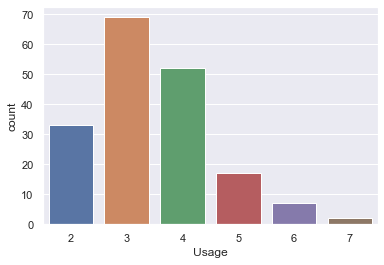

In [23]:
sns.countplot(data = df, x = 'Usage'); # count plot

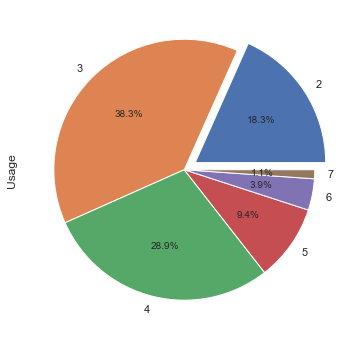

In [24]:
plt.figure(figsize = (6,6))
df['Usage'].value_counts(sort = False).plot(kind = 'pie', explode = (0.1, 0, 0, 0, 0, 0), autopct='%1.1f%%' )  # pie plot
plt.show()

**Observation :** more than 80% of the customers use treadmill no more than 4 times/ week.

### Fitness

In [25]:
freq_fitness = pd.crosstab(index = df['Fitness'], columns = 'count')     # frequency table for fitness
freq_fitness['percentage (%)'] = 100 *  freq_fitness / df['Fitness'].count()
freq_fitness.T

Fitness,1,2,3,4,5
col_0,,,,,
count,2.00,26.00,97.00,24.00,31.00
percentage (%),1.11,14.44,53.89,13.33,17.22


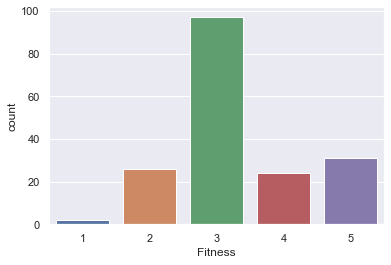

In [26]:
sns.countplot(data = df, x = 'Fitness');  # count plot

**Observation :** more than half of the customers identify themselves as medium fit. Few self identify as very unfit.

### Income

In [27]:
df['Income'].describe().to_frame().T  # summary for income

,count,mean,std,min,25%,50%,75%,max
Income,180.00,"53,719.58","16,506.68","29,562.00","44,058.75","50,596.50","58,668.00","104,581.00"


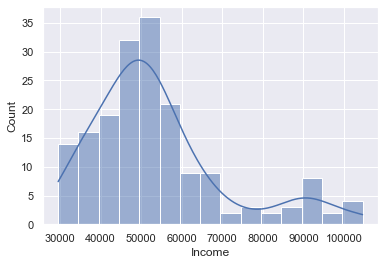

In [28]:
sns.histplot(data = df, x = 'Income', kde = True);  # histogram

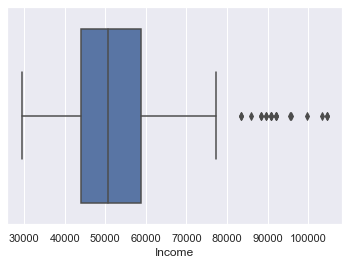

In [29]:
sns.boxplot(data = df, x = 'Income');   # box plot

**Observation :** 75% of customers have income less than \\$60,000. But a few outliers could achieve as high as \\$100,000.

### Miles

In [30]:
df['Miles'].describe().to_frame().T  # summary for miles

,count,mean,std,min,25%,50%,75%,max
Miles,180.00,103.19,51.86,21.00,66.00,94.00,114.75,360.00


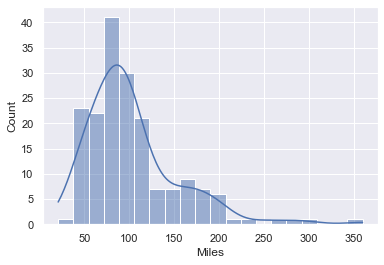

In [31]:
sns.histplot(data = df, x = 'Miles', kde = True);  # histogram

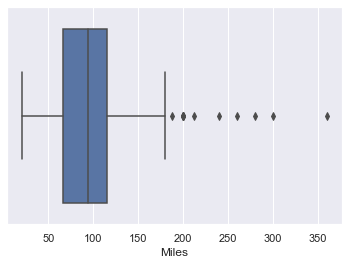

In [32]:
sns.boxplot(data = df, x = 'Miles');  # box plot

**Observation :** most expect to run less than 120 miles. A few outliers could run more than 200 miles. Median and mean are around 100 miles.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">3. Multivariate Analysis

### Age and product

In [33]:
#df[['Age', 'Product']].groupby('Product').describe()
df.groupby('Product')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,28.55,7.22,18.00,23.00,26.00,33.00,50.00
TM498,60.00,28.90,6.65,19.00,24.00,26.00,33.25,48.00
TM798,40.00,29.10,6.97,22.00,24.75,27.00,30.25,48.00


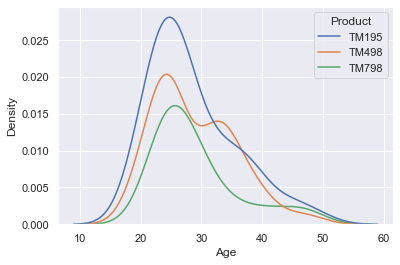

In [34]:
sns.kdeplot(x = 'Age', data = df, hue = 'Product');  # kde plot

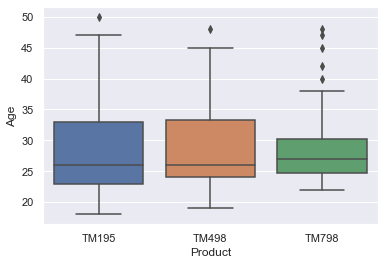

In [35]:
sns.boxplot(x = 'Product', y = 'Age', data = df); # box plot

**Observation :** the median age of customers for different products is similar, around 26 years old. TM195 and TM498 have a similar distribution, mainly between 18 - 45. TM798 has a more compacted distribution, mainly between 22 - 38.

### Gender and product

In [36]:
#df.groupby(['Product', 'Gender']).size().reset_index(name='count')
pd.crosstab(index = df['Product'], columns = df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


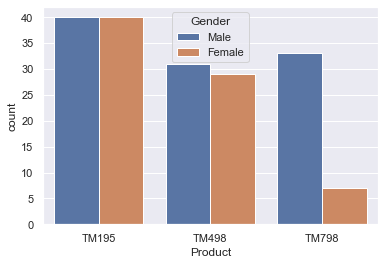

In [37]:
sns.countplot(x = 'Product' , data = df, hue = 'Gender');  # count plot

**Observation :** TM195 and TM498: even distribution of males and females. TM798: much more males than females.

### Income and product

In [38]:
#df[['Income', 'Product']].groupby('Product').describe()
df.groupby('Product')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,"46,418.03","9,075.78","29,562.00","38,658.00","46,617.00","53,439.00","68,220.00"
TM498,60.00,"48,973.65","8,653.99","31,836.00","44,911.50","49,459.50","53,439.00","67,083.00"
TM798,40.00,"75,441.57","18,505.84","48,556.00","58,204.75","76,568.50","90,886.00","104,581.00"


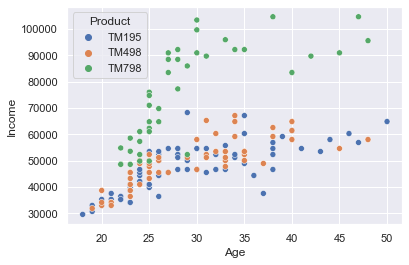

In [39]:
sns.scatterplot(x = 'Age', y = 'Income', hue = 'Product', data = df);  # scatter plot

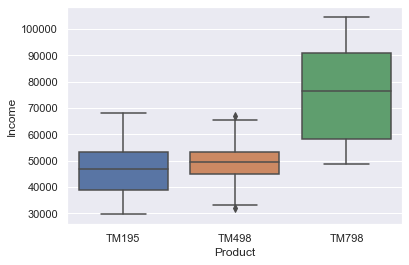

In [40]:
sns.boxplot(x = 'Product', y = 'Income', data = df);  # box plot

**Observation :** TM195 and TM498 have a similar distribution of income. TM798 has a distribution of higher income.

### Income, gender and product

In [41]:
df.groupby(['Product', 'Gender'])['Income'].describe()

count      mean       std       min       25%       50%  \
Product Gender                                                            
TM195   Female  40.00 46,020.07  9,226.21 30,699.00 37,521.00 46,048.50   
        Male    40.00 46,815.97  9,022.41 29,562.00 40,647.75 46,617.00   
TM498   Female  29.00 49,336.45  7,984.49 34,110.00 45,480.00 48,891.00   
        Male    31.00 48,634.26  9,356.20 31,836.00 44,343.00 50,028.00   
TM798   Female   7.00 73,633.86 19,009.93 52,291.00 57,271.00 69,721.00   
        Male    33.00 75,825.03 18,675.00 48,556.00 58,516.00 77,191.00   

                     75%        max  
Product Gender                       
TM195   Female 52,302.00  67,083.00  
        Male   53,723.25  68,220.00  
TM498   Female 52,302.00  65,220.00  
        Male   53,439.00  67,083.00  
TM798   Female 91,508.50  95,866.00  
        Male   90,886.00 104,581.00

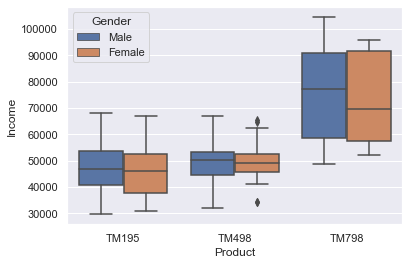

In [42]:
sns.boxplot(data = df, x = 'Product', y = 'Income', hue = 'Gender'); # box plot

**Observation:** for each product, the distribution of income between genders are pretty much the same. Female and male customers show similar spending power for our products.

### Education and product

In [43]:
#df[['Education', 'Product']].groupby('Product').describe()
df.groupby('Product')['Education'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,15.04,1.22,12.00,14.00,16.00,16.00,18.00
TM498,60.00,15.12,1.22,12.00,14.00,16.00,16.00,18.00
TM798,40.00,17.32,1.64,14.00,16.00,18.00,18.00,21.00


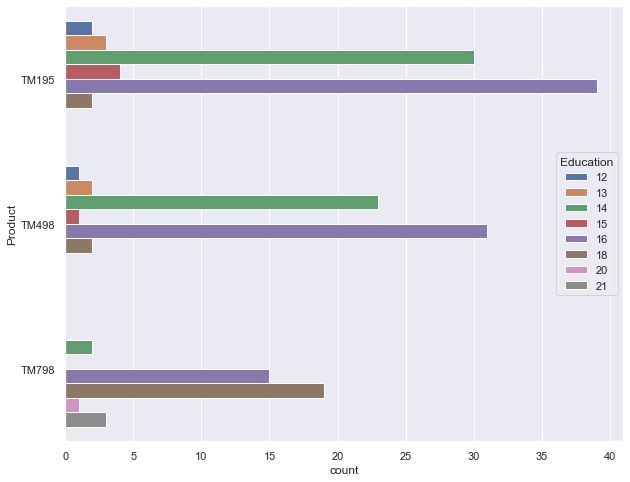

In [44]:
plt.figure(figsize = (10,8))
sns.countplot(hue = 'Education', y = 'Product', data = df);

**Observation :** TM195 and TM498 have a similar distribution of education years. Most of the samples fall into 16 or 14. Customers of TM798 have a higher education. Most of the samples fall into 18 or 16.

### Usage and product

In [45]:
pd.crosstab(index = df['Product'], columns = df['Usage']) 

Usage,2,3,4,5,6,7
Product,,,,,,
TM195,19,37,22,2,0,0
TM498,14,31,12,3,0,0
TM798,0,1,18,12,7,2


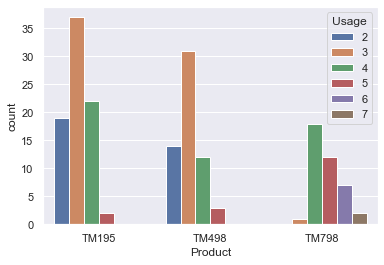

In [46]:
sns.countplot(x = 'Product', hue = 'Usage', data = df);

**Observation :** most customers of TM195 and TM498 use their products no more than 4 times/week. Customers of TM798 are more frequently using their treadmills, at least 4 times/week.

### Marital status and product

In [47]:
pd.crosstab(index = df['MaritalStatus'], columns = df['Product'])

Product,TM195,TM498,TM798
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


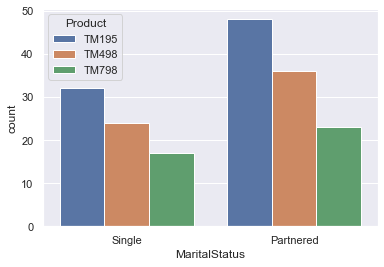

In [48]:
sns.countplot(x = 'MaritalStatus', data = df, hue = 'Product');

**Observation :** partnered customers are more than single customers for each product. Both groups have the same preference: TM195 > TM498 > TM798.

### Fitness and product

In [49]:
pd.crosstab(index = df['Product'], columns = df['Fitness'])

Fitness,1,2,3,4,5
Product,,,,,
TM195,1,14,54,9,2
TM498,1,12,39,8,0
TM798,0,0,4,7,29


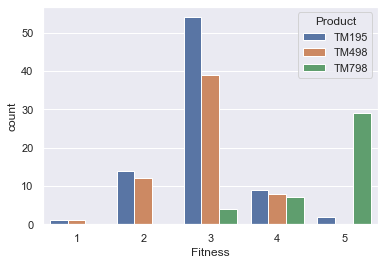

In [50]:
sns.countplot(x = 'Fitness', data = df, hue = 'Product');

**Observation :** low/medium fit customers prefer TM195 and TM498, while highly fit customers prefer TM798.

### Miles and product

In [51]:
#df[['Miles', 'Product']].groupby('Product').describe()
df.groupby('Product')['Miles'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
TM195,80.00,82.79,28.87,38.00,66.00,85.00,94.00,188.00
TM498,60.00,87.93,33.26,21.00,64.00,85.00,106.00,212.00
TM798,40.00,166.90,60.07,80.00,120.00,160.00,200.00,360.00


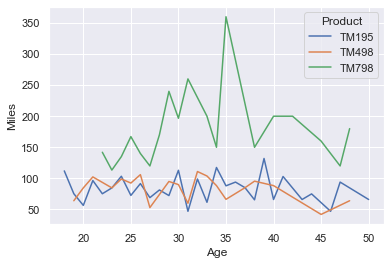

In [52]:
sns.lineplot(x = 'Age', y = 'Miles', hue = 'Product', data = df, ci = None); # line plot

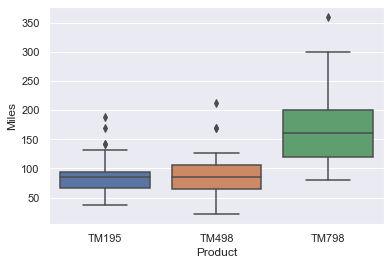

In [53]:
sns.boxplot(x = 'Product', y = 'Miles', data = df);  # box plot

**Observation :** people using TM798 run more than people using TM195 and TM498.

### Age, education,	usage, fitness,	income and miles

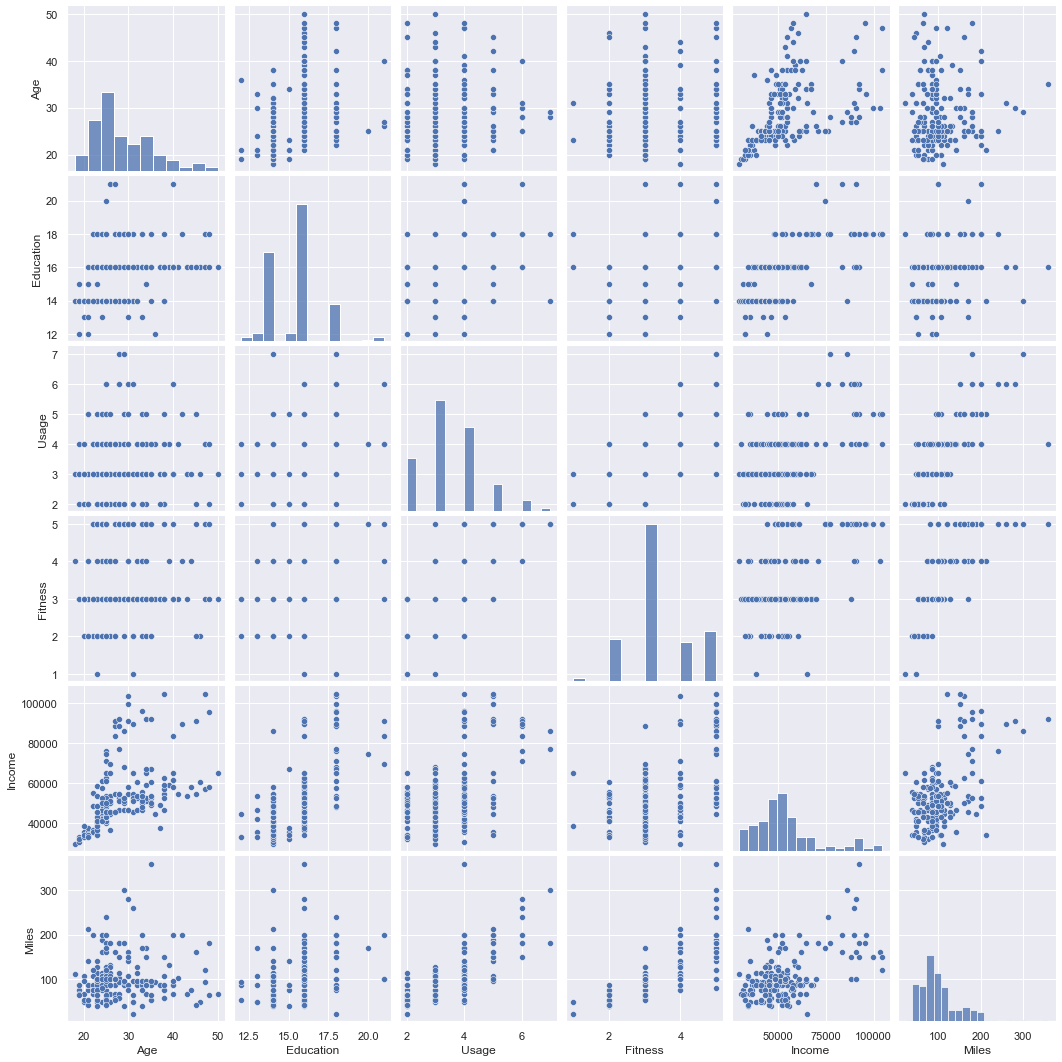

In [54]:
sns.pairplot(df);

**Observation :** 

Income increases with age and education.

Miles and fitness increase with usage. 

People with higher self-identified fitness tend to exercise more and have a higher income. 

### Correlation and heatmap

In [55]:
df.corr()  # generate correlations between numerical variables

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.28,0.02,0.06,0.51,0.04
Education,0.28,1.00,0.40,0.41,0.63,0.31
Usage,0.02,0.40,1.00,0.67,0.52,0.76
Fitness,0.06,0.41,0.67,1.00,0.54,0.79
Income,0.51,0.63,0.52,0.54,1.00,0.54
Miles,0.04,0.31,0.76,0.79,0.54,1.00


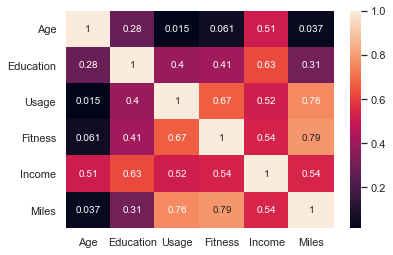

In [56]:
sns.heatmap(data = df.corr(), annot = True);  # heat map

**Observation :**

Strong correlation (0.7 - 0.9) exists between: Usage and Miles, Fitness and Miles.

Moderate correlation (0.5 - 0.7) exists between: Age and Income, Education and Income, Usage and Fitness, Usage and Income, Fitness and Income, Income and Miles.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">4. Conclusion

TM195 and TM498 have similar customer profile. TM798 has a distinct customer profile.

| Customer Profile | TM195 (#1 seller) | TM498 (#2 seller) | TM798 (#3 seller) |
| :- | :- | :- | :- |
| **Age (years old)**  | 18 - 47, median = 26  | 19 - 45, median = 26 | 22 - 38, median = 27 |
| **Gender** | Equally likely to be male or female | Equally likely to be male or female | More likely to be male |
| **Education (years)** | high education, likely to be 16 or 14 | high education, likely to be 16 or 14 | high education, likely to be 18 or 16 |
| **Marital Status** | More likely to be partnered | More likely to be partnered | More likely to be partnered |
| **Usage (times per week)** | <= 4 | <= 4 | >= 4 |
| **Fitness** | Low/ Medium (2 - 3) | Low/ Medium (2 - 3) | High (4 - 5) |
| **Income (USD)** | 29,000 - 68,000, median = 46,000 | 32,000 - 67,000, median = 49,000 | 48,000 - 104,000, median = 76,000 |
| **Miles** | median = 85 | median = 85 | median = 160 |

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">5. Recommendation

- Boost the sales volume of TM798. 

- Target customer of TM798: under 30 years old, partnered, high education, high income, active in exercise and highly fit.

- Understand female consumer's desires for TM798 and engage them with more powerful promotional campaigns.